In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.14.0'

# Load MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) dataset is a large collection of handwritten digits that is commonly used for training and testing various image processing systems, particularly in the field of machine learning and computer vision

In [3]:
# fashion_mnist present in keras library
mnist=tf.keras.datasets.fashion_mnist

In [4]:
(train_image, train_level),(test_image, test_level) =mnist.load_data()

# Representing Data

(60000, 28, 28)
9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

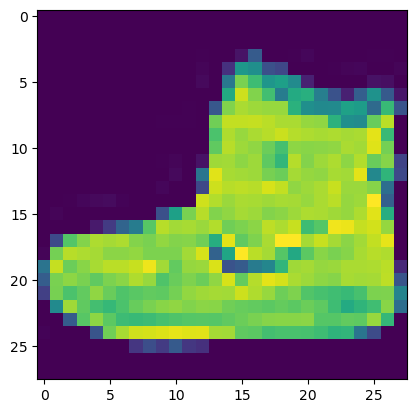

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(train_image[0])
print(train_image.shape)
print(train_level[0])
print(train_image[0])


# numbers are showing the pixel values


# Normalizing the Data
In deep learning, normalizing the data refers to the process of scaling and transforming the data to fall within a specific range or distribution. This is an essential preprocessing step because it can significantly enhance the performance and training speed of neural networks. Normalization ensures that each input feature contributes equally to the learning process and helps prevent issues such as exploding or vanishing gradients

In [6]:
trian_image = train_image/255.0
test_image = test_image/255.0

# Creating Neural Network and Training Data

In [7]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Activation,Flatten
# from tensorflow.keras.optimizers import Adam
# model=Sequential()
# ###first layer
# model.add(Flatten())

# ###second layer
# model.add(Dense(128))
# model.add(Activation('relu'))

# ###final layer
# model.add(Dense(10))
# model.add(Activation('softmax'))


In [8]:
model= tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                 tf.keras.layers.Dense(10,activation=tf.nn.softmax)])



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
# model.fit(train_image, train_level, epochs=10)

model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_image, train_level, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4783 - accuracy: 0.8435
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4707 - accuracy: 0.8448
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4693 - accuracy: 0.8472
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4689 - accuracy: 0.8471
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4666 - accuracy: 0.8479
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4631 - accuracy: 0.8493
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4589 - accuracy: 0.8513
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4664 - accuracy: 0.8500
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4601 - accuracy: 0.8514
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.45

# Evaluating the Data

In [14]:
model.evaluate(test_image, test_level)

313/313 [==============================] - 1s 3ms/step - loss: 2.9237 - accuracy: 0.1303


[2.923656463623047, 0.13030000030994415]